# Code 1

TensorFlow version: 2.18.0


Downloading...
From (original): https://drive.google.com/uc?id=1eyrNGFlM83pf-TETo30Cvjm7kYuCFAqu
From (redirected): https://drive.google.com/uc?id=1eyrNGFlM83pf-TETo30Cvjm7kYuCFAqu&confirm=t&uuid=9667ce28-4830-4dc9-9f0f-7cbf4c70081d
To: /content/dataset.zip
100%|██████████| 1.16G/1.16G [00:19<00:00, 59.5MB/s]
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,122,705 (8.10 MB)

 Trainable params: 2,122,705 (8.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 50s 124ms/step - accuracy: 0.5980 - loss: 0.6544 - val_accuracy: 0.7524 - val_loss: 0.5195
Epoch 2/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 74s 112ms/step - accuracy: 0.7471 - loss: 0.5120 - val_accuracy: 0.8084 - val_loss: 0.4290
Epoch 3/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 39s 107ms/step - accuracy: 0.7957 - loss: 0.4359 - val_accuracy: 0.8280 - val_loss: 0.3715
Epoch 4/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.8284 - loss: 0.3806 - val_accuracy: 0.8128 - val_loss: 0.4029
Epoch 5/5
352/352 ━━━━━━━━━━━━━━━━━━━━ 42s 115ms/step - accuracy: 0.8520 - loss: 0.3308 - val_accuracy: 0.8600 - val_loss: 0.3283


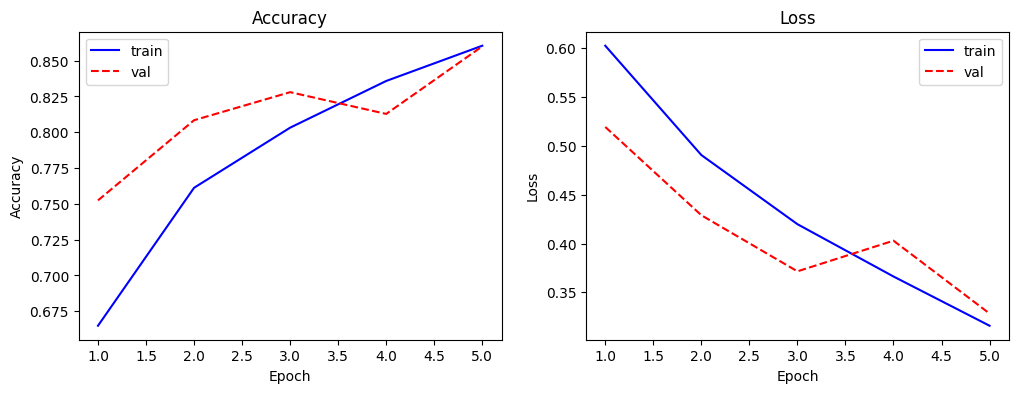

40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step


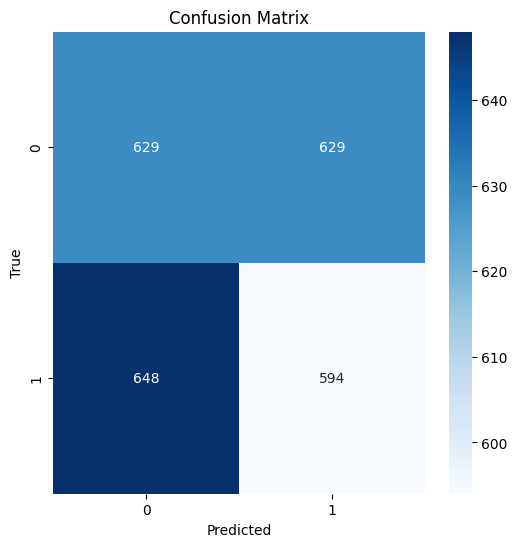

              precision    recall  f1-score   support

         cat       0.49      0.50      0.50      1258
         dog       0.49      0.48      0.48      1242

    accuracy                           0.49      2500
   macro avg       0.49      0.49      0.49      2500
weighted avg       0.49      0.49      0.49      2500



In [ ]:
# -*- coding: utf-8 -*-
"""
Basic版 – 最小實踐，符合所有作業需求，含評估結果輸出
執行環境：Google Colab 免費版
"""

# Step 1: 套件匯入
import os, zipfile, random
import gdown
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, callbacks
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

print("TensorFlow version:", tf.__version__)

# Step 2: 下載並解壓資料集
file_id = "1eyrNGFlM83pf-TETo30Cvjm7kYuCFAqu"
gdown.download(f"https://drive.google.com/uc?id={file_id}",
               output="dataset.zip", quiet=False)
with zipfile.ZipFile("dataset.zip", 'r') as zip_ref:
    zip_ref.extractall("dataset")

# Step 3: 建立 DataFrame
IMAGE_HEIGHT = 128
IMAGE_WIDTH  = 128
BATCH_SIZE   = 64

def get_pathframe(path):
    filenames = os.listdir(path)
    categories, paths = [], []
    for fname in filenames:
        paths.append(os.path.join(path, fname))
        categories.append(1 if fname.startswith('dog') else 0)
    return pd.DataFrame({'filename': filenames,
                         'category': categories,
                         'path': paths})

df = get_pathframe("dataset/dataset/dataset/")

# Step 4: 影像前處理
def load_and_preprocess_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, [IMAGE_HEIGHT, IMAGE_WIDTH])
    return img / 255.0

def convert_to_tensor(df):
    path_ds = tf.data.Dataset.from_tensor_slices(df['path'])
    img_ds  = path_ds.map(load_and_preprocess_image,
                          num_parallel_calls=tf.data.AUTOTUNE)
    label_ds= tf.data.Dataset.from_tensor_slices(
                tf.cast(df['category'], tf.int64))
    return img_ds, label_ds

X_ds, Y_ds = convert_to_tensor(df)

# Step 5: 切分與批次化
full_ds = tf.data.Dataset.zip((X_ds, Y_ds)).shuffle(2000, seed=42)
train_ds = full_ds.take(22500).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds  = full_ds.skip(22500).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Step 6a: Basic CNN Model
def Basic_CNN():
    model = models.Sequential([
        layers.Conv2D(8, (3,3), padding='same', activation='relu',
                      input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(16, (3,3), padding='same', activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizers.Adam(1e-3),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

basic_model = Basic_CNN()
basic_model.summary()

# Step 7: 訓練與評估
history_basic = basic_model.fit(
    train_ds, epochs=5, validation_data=test_ds
)

# 畫出訓練曲線
def plot_history(h):
    epochs = range(1, len(h.history['loss'])+1)
    plt.figure(figsize=(12,4))
    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(epochs, h.history['accuracy'], 'b-', label='train')
    plt.plot(epochs, h.history['val_accuracy'], 'r--', label='val')
    plt.title('Accuracy')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
    # Loss
    plt.subplot(1,2,2)
    plt.plot(epochs, h.history['loss'], 'b-', label='train')
    plt.plot(epochs, h.history['val_loss'], 'r--', label='val')
    plt.title('Loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend()
    plt.show()

plot_history(history_basic)

# 混淆矩陣與分類報告
y_pred = (basic_model.predict(test_ds) > 0.5).astype(int).flatten()
y_true = np.concatenate([y for x,y in test_ds], axis=0)

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted'); plt.ylabel('True'); plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred, target_names=['cat','dog']))


# Fine Tune (Code2)

In [ ]:
# -*- coding: utf-8 -*-
"""
Student: <Your Name>
ID: <Your Student ID>
Lab6 CNN Homework – 基本版
來源: Lab6_CNN Homework.pdf :contentReference[oaicite:0]{index=0}&#8203;:contentReference[oaicite:1]{index=1}
"""
import os
import zipfile
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# 1. 顯示 TensorFlow 版本
print("TensorFlow version:", tf.__version__)

# 2. 下載並解壓資料集
file_id = "1eyrNGFlM83pf-TETo30Cvjm7kYuCFAqu"
if not os.path.exists("dataset.zip"):
    gdown.download(f"https://drive.google.com/uc?id={file_id}", "dataset.zip", quiet=False)
with zipfile.ZipFile("dataset.zip", "r") as zip_ref:
    zip_ref.extractall("dataset")

# 3. 建立 DataFrame：檔名、類別(0=cat,1=dog)、路徑
def get_pathframe(path):
    filenames = os.listdir(path)
    categories, paths = [], []
    for fname in filenames:
        categories.append(1 if fname.split('.')[0] == 'dog' else 0)
        paths.append(os.path.join(path, fname))
    return pd.DataFrame({"filename": filenames,
                         "category": categories,
                         "filepath": paths})

df = get_pathframe("dataset/dataset/dataset/")

# 4. 切分訓練/測試集
train_df = df.sample(frac=0.75, random_state=1)
test_df = df.drop(train_df.index)

# 5. 建立 tf.data pipeline
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 64

def load_and_preprocess(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMAGE_SIZE)
    img = img / 255.0
    return img, label

# 資料增強：水平翻轉 + 微幅旋轉
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
], name="data_augmentation")

def make_dataset(df, shuffle=True, augment=False):
    ds = tf.data.Dataset.from_tensor_slices((df["filepath"], df["category"]))
    ds = ds.map(load_and_preprocess, tf.data.AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(buffer_size=len(df))
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x), y), tf.data.AUTOTUNE)
    return ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_ds = make_dataset(train_df, shuffle=True, augment=True)
test_ds = make_dataset(test_df, shuffle=False, augment=False)

# 6. 顯示部分訓練樣本
def plot_samples(ds, n=5):
    images, labels = next(iter(ds.unbatch().batch(n)))
    plt.figure(figsize=(10,4))
    for i in range(n):
        ax = plt.subplot(1, n, i+1)
        plt.imshow(images[i])
        plt.title("Dog" if labels[i] == 1 else "Cat")
        plt.axis("off")
    plt.show()

plot_samples(train_ds)

# 7. 建構模型 (加 BatchNormalization + Dropout)
def build_model():
    model = models.Sequential([
        layers.Conv2D(8, 3, padding="same", activation="relu", input_shape=(*IMAGE_SIZE, 3)),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Conv2D(16, 3, padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Conv2D(32, 3, padding="same", activation="relu"),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),

        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

model = build_model()
model.summary()

# 8. 訓練模型
history = model.fit(
    train_ds,
    epochs=5,                # 小批次訓練，以利後續版本比較
    validation_data=test_ds
)

# 9. 繪製訓練 / 驗證曲線
def plot_history(h):
    plt.figure(figsize=(12,4))
    # Accuracy
    plt.subplot(1,2,1)
    plt.plot(h.history["accuracy"], label="train")
    plt.plot(h.history["val_accuracy"], label="val")
    plt.title("Accuracy"); plt.xlabel("Epoch"); plt.legend()
    # Loss
    plt.subplot(1,2,2)
    plt.plot(h.history["loss"], label="train")
    plt.plot(h.history["val_loss"], label="val")
    plt.title("Loss"); plt.xlabel("Epoch"); plt.legend()
    plt.show()

plot_history(history)

# 10. 在測試集上評估
loss, acc = model.evaluate(test_ds)
print(f"Test accuracy = {acc:.4f}; loss = {loss:.4f}")

# 11. 混淆矩陣與分類報表
y_pred = (model.predict(test_ds) > 0.5).astype(int).flatten()
y_true = np.concatenate([y for x, y in test_ds.unbatch().batch(len(test_df))])

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted"); plt.ylabel("True"); plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_true, y_pred, target_names=["Cat","Dog"]))
